In [2]:
#Helper Functions
# find factors automatically
def factorsFind(num, prefer=None):
    if prefer is not None:
        bestDivider = prefer
        return bestDivider, int(num/bestDivider)
    bestDivider = 1
    for i in range(2,int(num/2)):
        if num%i == 0:
            bestDivider = i
    return bestDivider, int(num/bestDivider)

def plotSpecialTool(data,labels,samples2Visualize=12,factors=[2,6], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=[]):
    # samples2Visualize = 12 # sample 12 random number
    # factors = [2,6] # indicate two factors for number of samples
    assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
    figure = plt.figure(figsize=figsize)
    nLimit = data.shape[0]
    for i in range(1,samples2Visualize+1):
        img = figure.add_subplot(factors[0],factors[1],i)
        # randomly sample an image from train set
        
        if len(indexes) != 0:
            imgID = indexes[i-1]
        else: 
            imgID = np.random.randint(nLimit-1)
            
        image = data[imgID]
        image = image * 255.
        
        if len(reshaper) != 0:
            image = image.reshape(reshaper[0], reshaper[1])
            
        if grayFlag:
            plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(image+thr)
            
        if len(labels) != 0:
            img.set_title(labels[imgID],fontsize=7)
            
        plt.axis('off')

## Undercomplete AutoEncoder:

First AutoEncoder Example:
<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 900px;"/>

In [3]:
# ~/.keras/dataset
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 3s 0us/step
(60000, 784)
(10000, 784)


In [4]:
# Step 1: Import Libraries
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [5]:
encodingDim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [6]:
# this is our input placeholder
inputImg = Input(shape=(784,))

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [7]:
# "encoded" is the encoded representation of the input
encoded = Dense(encodingDim, activation='relu')(inputImg)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [8]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [9]:
# this model maps an input to its reconstruction
autoencoder = Model(inputImg, decoded)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [10]:
# this model maps an input to its encoded representation
encoder = Model(inputImg, encoded)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [11]:
# create a placeholder for an encoded (32-dimensional) input
encodedInput = Input(shape=(encodingDim,))

In [12]:
# retrieve the last layer of the autoencoder model
decoderLayer = autoencoder.layers[-1]

In [13]:
# create the decoder model
decoder = Model(encodedInput, decoderLayer(encodedInput))

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 850px;"/>

In [14]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6931 - val_loss: 0.6930

In [16]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('simpleAE.h5')

In [17]:
# save models and weights
autoencoder.save('simpleAE.h5')

In [18]:
# encode and decode some digits
# note that we take them from the *test* set
encodedImgs = encoder.predict(x_test)
decodedImgs = decoder.predict(encodedImgs)

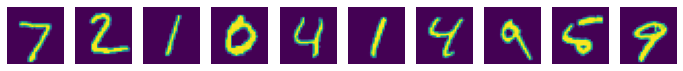

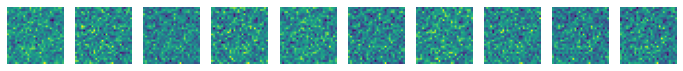

In [19]:
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

In [20]:
del autoencoder

## Sparse AutoEncoder:

In [21]:
# add a Dense layer with a L1 activity regularizer
from keras import regularizers
encoded = Dense(encodingDim, activation='relu',
                activity_regularizer=regularizers.l1(10e-8))(inputImg)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputImg, decoded)

In [22]:
autoencoder = Model(inputImg, decoded)

In [23]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.6949 - val_loss: 0.6949
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6947 - val_loss: 0.6947
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6942 - val_loss: 0.6942
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6934 - val_loss: 0.6934

In [25]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('sparseAE.h5')

In [26]:
# save models and weights
autoencoder.save('sparseAE.h5')

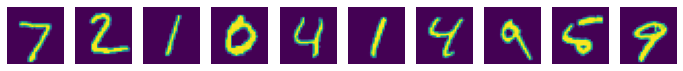

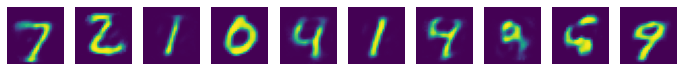

In [27]:
decodedImgs = autoencoder.predict(x_test)
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

## Deep AutoEncoder:

In [28]:
# easily extendible to deep
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)

In [29]:
encoded = Dense(64, activation='relu')(encoded)

In [30]:
encoded = Dense(32, activation='relu')(encoded)

In [31]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [32]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6919 - val_loss: 0.6918
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6917 - val_loss: 0.6916
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6915 - val_loss: 0.6915
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6914 - val_loss: 0.6913
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6913 - val_loss: 0.6912
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6912 - val_loss: 0.6911
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6911 - val_loss: 0.6910
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6909 - val_lo

235/235 [==============================] - 2s 8ms/step - loss: 0.6185 - val_loss: 0.6147
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6126 - val_loss: 0.6085
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6062 - val_loss: 0.6017
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.5992 - val_loss: 0.5944
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.5916 - val_loss: 0.5865
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 0.5835 - val_loss: 0.5779
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 0.5746 - val_loss: 0.5687
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 0.5651 - val_loss: 0.5588
Epoch 89/100
235/235 [==============================] - 2s 9ms/step - loss: 0.5549 - val_loss: 0.5482
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.5441 - val_loss:

In [33]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('deepAE.h5')

In [34]:
# save models and weights
autoencoder.save('deepAE.h5')

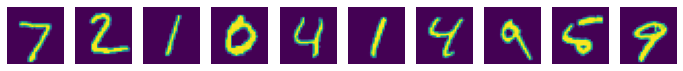

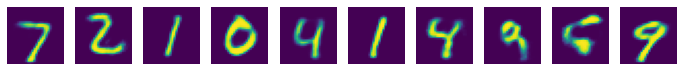

In [35]:
decodedImgs = autoencoder.predict(x_test)
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

Encoder and and decoder steps can be fully connected, convolutional, recurrent, etc.

<div style="width: 1000px; float:right;margin:0 10px 10px 0" markdown="1">
![tfImage](elements/images/01AE/Autoencoder.png)
</div>

## Convolutional AutoEncoder

In [36]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [37]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

In [38]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)

In [39]:
x = MaxPooling2D((2, 2), padding='same')(x)

In [40]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [41]:
x = MaxPooling2D((2, 2), padding='same')(x)

In [42]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [43]:
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [44]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

In [45]:
x = UpSampling2D((2, 2))(x)

In [46]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [47]:
x = UpSampling2D((2, 2))(x)

In [48]:
x = Conv2D(16, (3, 3), activation='relu')(x)

In [49]:
x = UpSampling2D((2, 2))(x)

In [50]:
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [51]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# run tensorboard in your command line
tensorboard --logdir=/tmp/autoencoder

In [52]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/5
469/469 [==============================] - 44s 91ms/step - loss: 0.7027 - val_loss: 0.7009
Epoch 2/5
469/469 [==============================] - 44s 94ms/step - loss: 0.6992 - val_loss: 0.6974
Epoch 3/5
469/469 [==============================] - 46s 99ms/step - loss: 0.6957 - val_loss: 0.6940
Epoch 4/5
469/469 [==============================] - 45s 96ms/step - loss: 0.6920 - val_loss: 0.6898
Epoch 5/5
469/469 [==============================] - 52s 111ms/step - loss: 0.6869 - val_loss: 0.6835


In [53]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('convAE.h5')

In [54]:
# save models and weights
autoencoder.save('convAE.h5')

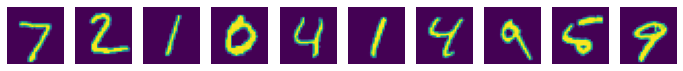

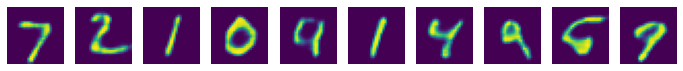

In [55]:
decodedImgs = autoencoder.predict(x_test)
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

## Denoising AutoEncoder

In [56]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [57]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

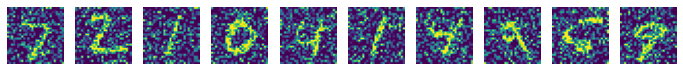

In [58]:
plotSpecialTool(x_test_noisy,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

In [59]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

In [60]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)

In [61]:
x = MaxPooling2D((2, 2), padding='same')(x)

In [62]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [63]:
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

In [64]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [65]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [66]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/5
469/469 [==============================] - 69s 145ms/step - loss: 0.6449 - val_loss: 0.6307
Epoch 2/5
469/469 [==============================] - 69s 148ms/step - loss: 0.6067 - val_loss: 0.5797
Epoch 3/5
469/469 [==============================] - 73s 155ms/step - loss: 0.5482 - val_loss: 0.5257
Epoch 4/5
469/469 [==============================] - 75s 160ms/step - loss: 0.5118 - val_loss: 0.5081
Epoch 5/5
469/469 [==============================] - 84s 178ms/step - loss: 0.5008 - val_loss: 0.5008


In [67]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('denoiseAE.h5')

In [68]:
# save models and weights
autoencoder.save('denoiseAE.h5')

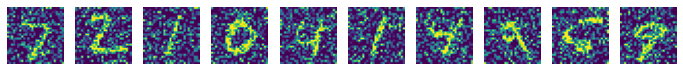

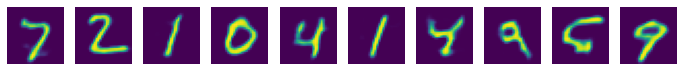

In [69]:
decodedImgs = autoencoder.predict(x_test_noisy)
allIdx = range(10)
plotSpecialTool(x_test_noisy,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()